**Muhammad Zacky Said 105222046**


**Muhammad Zaky Tabrani 105222026**

**1. EDA**

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

base_path = 'dataset'
classes = ['anemic', 'nonanemic']

class_data = {}    

Dataset terdiri dari dua kelas utama, yaitu anemic dan nonanemic, yang masing-masing berisi sejumlah gambar dalam format .png. Dataset diorganisasi dalam folder terpisah berdasarkan kelasnya. Setiap gambar dibaca menggunakan library PIL, dan informasi mengenai ukuran (lebar dan tinggi) dikumpulkan dalam sebuah struktur data class_data.


==== KELAS: ANEMIC ====
Jumlah total gambar: 2563
List File (10 pertama):
['Anemic-001 (10).png', 'Anemic-001 (11).png', 'Anemic-001 (12).png', 'Anemic-001 (2).png', 'Anemic-001 (3).png', 'Anemic-001 (4).png', 'Anemic-001 (5).png', 'Anemic-001 (6).png', 'Anemic-001 (7).png', 'Anemic-001 (8).png']


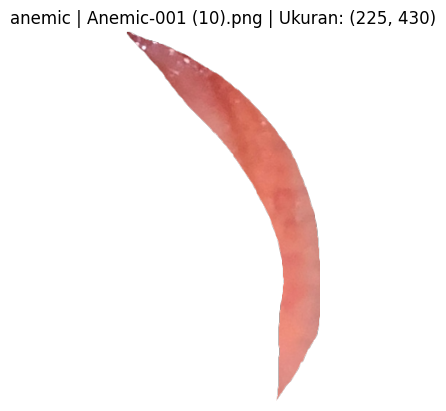

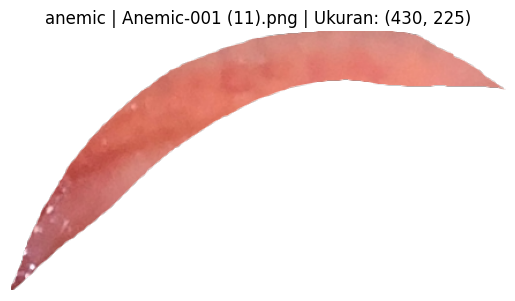

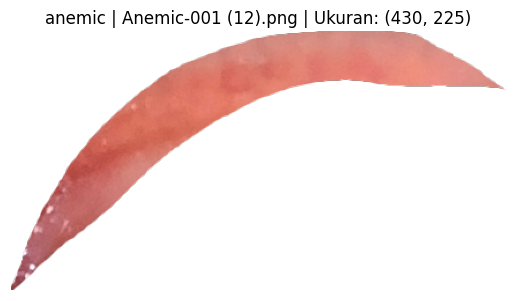


==== KELAS: NONANEMIC ====
Jumlah total gambar: 1714
List File (10 pertama):
['Non-Anemic-001.png', 'Non-Anemic-002 (2).png', 'Non-Anemic-002 (3).png', 'Non-Anemic-002 (4).png', 'Non-Anemic-002 (5).png', 'Non-Anemic-002 (6).png', 'Non-Anemic-002.png', 'Non-Anemic-003 (2).png', 'Non-Anemic-003 (3).png', 'Non-Anemic-003 (4).png']


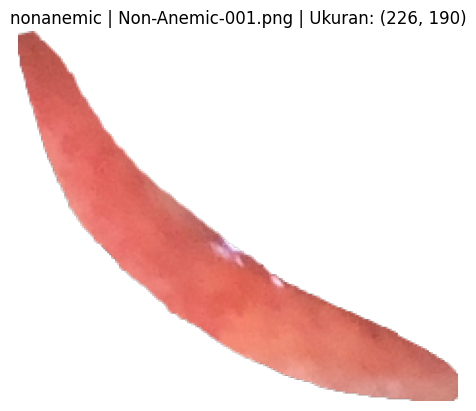

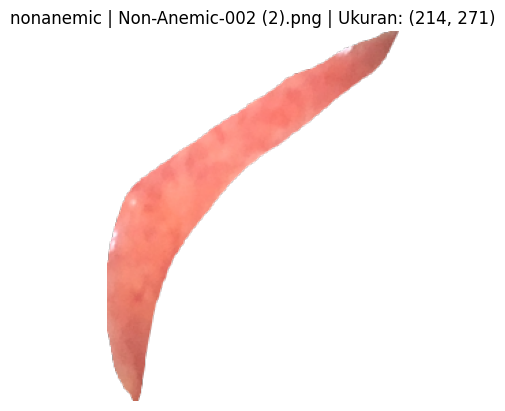

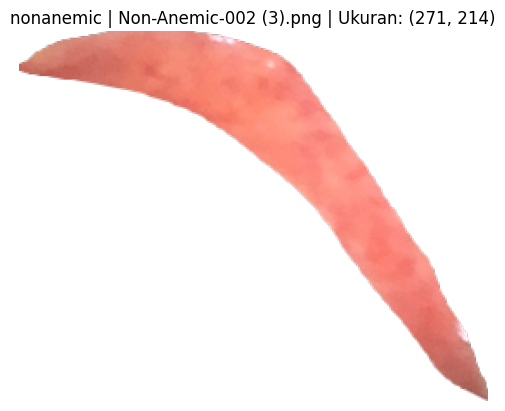

In [ ]:
for class_name in classes:
    print(f"\n==== KELAS: {class_name.upper()} ====")
    dataset_path = os.path.join(base_path, class_name)
    
    image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"Jumlah total gambar: {len(image_files)}")
    print("List File (10 pertama):")
    print(image_files[:10])
    
    widths, heights, aspects = [], [], []

    for img_file in image_files:
        img_path = os.path.join(dataset_path, img_file)
        with Image.open(img_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspects.append(w / h)

    class_data[class_name] = {
        'files': image_files,
        'widths': np.array(widths),
        'heights': np.array(heights),
        'aspects': np.array(aspects),
    }

    for img_file in image_files[:3]:
        img_path = os.path.join(dataset_path, img_file)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"{class_name} | {img_file} | Ukuran: {img.size}")
        plt.axis('off')
        plt.show()

In [8]:
class_data

{'anemic': {'files': ['Anemic-001 (10).png',
   'Anemic-001 (11).png',
   'Anemic-001 (12).png',
   'Anemic-001 (2).png',
   'Anemic-001 (3).png',
   'Anemic-001 (4).png',
   'Anemic-001 (5).png',
   'Anemic-001 (6).png',
   'Anemic-001 (7).png',
   'Anemic-001 (8).png',
   'Anemic-001 (9).png',
   'Anemic-001.png',
   'Anemic-001FV (10).png',
   'Anemic-001FV (11).png',
   'Anemic-001FV (12).png',
   'Anemic-001FV (2).png',
   'Anemic-001FV (3).png',
   'Anemic-001FV (4).png',
   'Anemic-001FV (5).png',
   'Anemic-001FV (6).png',
   'Anemic-001FV (7).png',
   'Anemic-001FV (8).png',
   'Anemic-001FV (9).png',
   'Anemic-001FV.png',
   'Anemic-001RA (10).png',
   'Anemic-001RA (11).png',
   'Anemic-001RA (12).png',
   'Anemic-001RA (2).png',
   'Anemic-001RA (3).png',
   'Anemic-001RA (4).png',
   'Anemic-001RA (5).png',
   'Anemic-001RA (6).png',
   'Anemic-001RA (7).png',
   'Anemic-001RA (8).png',
   'Anemic-001RA (9).png',
   'Anemic-001RA.png',
   'Anemic-002 (10).png',
   'Anemic

Jumlah gambar untuk masing-masing kelas dihitung, dan ditampilkan menggunakan bar chart untuk melihat distribusi kelas. Kemudian, dilakukan perhitungan statistik deskriptif terhadap ukuran gambar (lebar dan tinggi), serta rasio aspek (lebar/tinggi) dari gambar di setiap kelas.

In [9]:
print("\nStatistik Ukuran Gambar per Kelas:")
for class_name in classes:
    widths = class_data[class_name]['widths']
    heights = class_data[class_name]['heights']
    aspects = class_data[class_name]['aspects']
    
    print(f"\n{class_name.upper()}")
    print(f"- Rata-rata lebar : {np.mean(widths):.2f}px")
    print(f"- Rata-rata tinggi: {np.mean(heights):.2f}px")
    print(f"- Rasio aspek rata-rata: {np.mean(aspects):.2f}")
    print(f"- Min/Max lebar: {np.min(widths)} / {np.max(widths)}")
    print(f"- Min/Max tinggi: {np.min(heights)} / {np.max(heights)}")


Statistik Ukuran Gambar per Kelas:

ANEMIC
- Rata-rata lebar : 151.80px
- Rata-rata tinggi: 151.74px
- Rasio aspek rata-rata: 1.53
- Min/Max lebar: 22 / 462
- Min/Max tinggi: 22 / 462

NONANEMIC
- Rata-rata lebar : 168.20px
- Rata-rata tinggi: 167.67px
- Rasio aspek rata-rata: 1.59
- Min/Max lebar: 22 / 513
- Min/Max tinggi: 22 / 513


Distribusi ukuran gambar divisualisasikan menggunakan histogram untuk lebar, tinggi, dan rasio aspek. Selain itu, dibuat juga heatmap 2D (menggunakan hexbin plot) untuk menunjukkan sebaran ukuran gambar (lebar vs tinggi), yang membantu memutuskan apakah perlu dilakukan proses resize. 

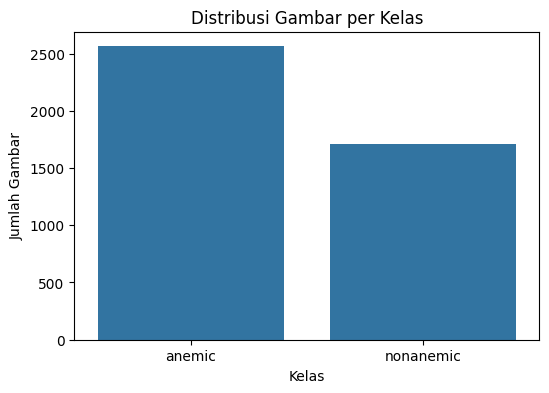

In [ ]:
from collections import Counter
import seaborn as sns

labels = []
for class_name in classes:
    labels.extend([class_name] * len(class_data[class_name]['files']))

plt.figure(figsize=(6, 4))
sns.countplot(x=labels)
plt.title("Distribusi Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.show()


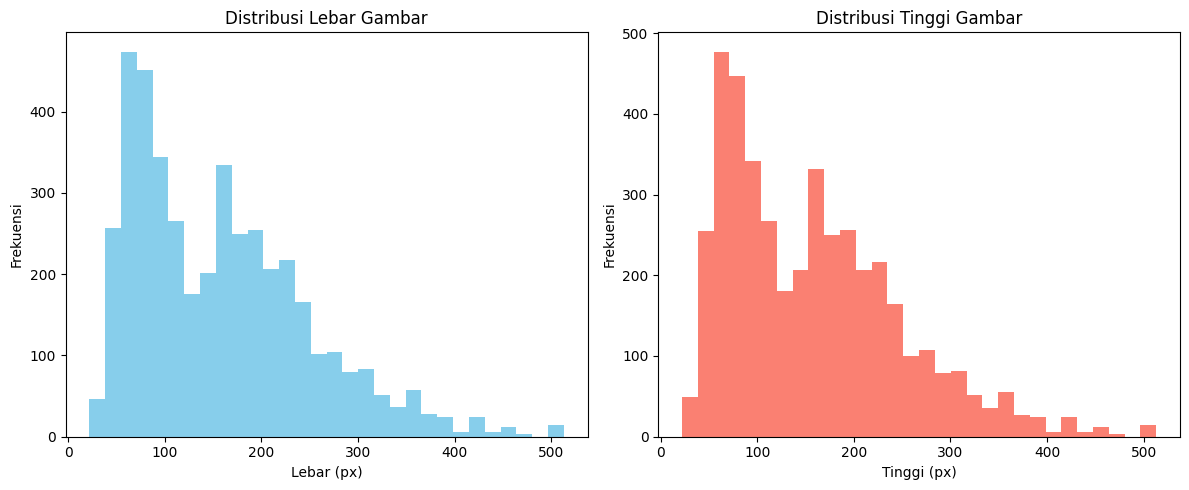

In [11]:
all_widths = np.concatenate([class_data[c]['widths'] for c in classes])
all_heights = np.concatenate([class_data[c]['heights'] for c in classes])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(all_widths, bins=30, color='skyblue')
plt.title("Distribusi Lebar Gambar")
plt.xlabel("Lebar (px)")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
plt.hist(all_heights, bins=30, color='salmon')
plt.title("Distribusi Tinggi Gambar")
plt.xlabel("Tinggi (px)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


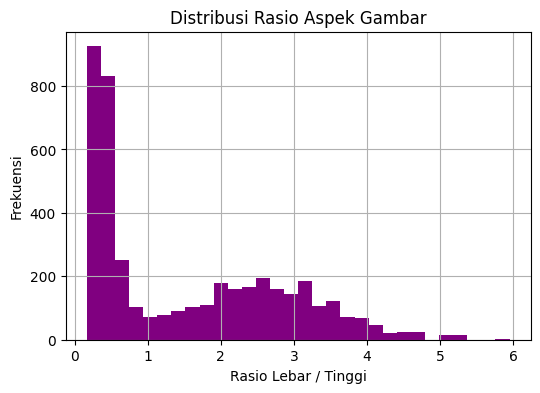

In [12]:
all_aspects = np.concatenate([class_data[c]['aspects'] for c in classes])

plt.figure(figsize=(6, 4))
plt.hist(all_aspects, bins=30, color='purple')
plt.title("Distribusi Rasio Aspek Gambar")
plt.xlabel("Rasio Lebar / Tinggi")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()


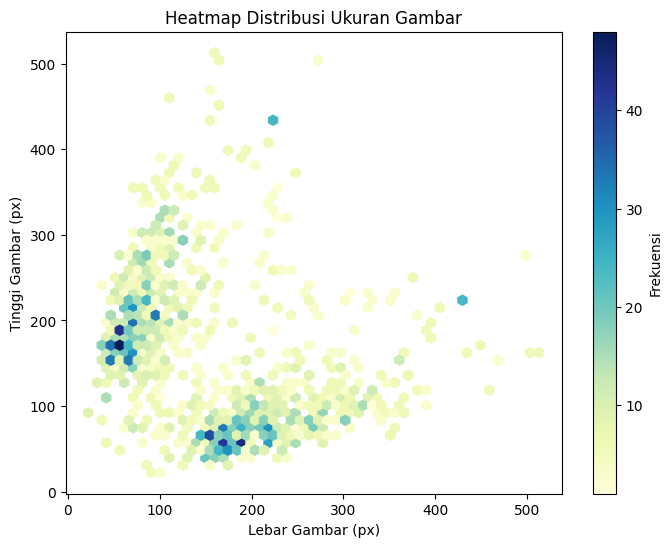

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

widths_anemic = class_data['anemic']['widths']
heights_anemic = class_data['anemic']['heights']

widths_nonanemic = class_data['nonanemic']['widths']
heights_nonanemic = class_data['nonanemic']['heights']

widths = np.concatenate([widths_anemic, widths_nonanemic])
heights = np.concatenate([heights_anemic, heights_nonanemic])

plt.figure(figsize=(8, 6))
plt.hexbin(widths, heights, gridsize=50, cmap='YlGnBu', mincnt=1)
plt.colorbar(label='Frekuensi')
plt.xlabel('Lebar Gambar (px)')
plt.ylabel('Tinggi Gambar (px)')
plt.title('Heatmap Distribusi Ukuran Gambar')
plt.show()


**2. Preprocessing**

In [14]:
!pip install scikit-learn

In [15]:
!pip install imbalanced-learn

In [16]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

Seluruh gambar diubah ukurannya menjadi 64x64 piksel dan dikonversi ke format RGB. Setelah itu, gambar dinormalisasikan dengan membagi nilai piksel terhadap 255, dan kemudian di-flatten menjadi vektor 1 dimensi agar dapat digunakan dalam pelatihan model. Label untuk setiap gambar diubah ke format numerik (anemic = 0, nonanemic = 1).

In [27]:
IMG_SIZE = (64, 64)
X, y = [], []

for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(img_path).convert('RGB') 
                img = img.resize(IMG_SIZE)
                img_array = np.array(img) / 255.0
                X.append(img_array.flatten())
                y.append(class_name)
            except:
                continue

X = np.array(X)
y = np.array(y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Sebelum pelatihan, dilakukan reduksi dimensi menggunakan PCA (Principal Component Analysis) dengan jumlah komponen sebanyak 100 untuk menyederhanakan representasi fitur gambar. Setelah itu, dilakukan penyeimbangan data menggunakan metode SMOTE (Synthetic Minority Oversampling Technique) untuk mengatasi ketidakseimbangan kelas dan meningkatkan performa klasifikasi.

In [ ]:
pca = PCA(n_components=100) 
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

**3. Modelling**

Model yang digunakan adalah K-Nearest Neighbors (KNN) dari library sklearn, dengan parameter n_neighbors = 3. Dataset dibagi menjadi data latih dan data uji dengan perbandingan 80:20. Model dilatih menggunakan data hasil preprocessing dan reduksi dimensi. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

**4. Evaluasi Model**

Evaluasi model dilakukan menggunakan confusion matrix dan classification report dari sklearn. Hasil evaluasi menunjukkan akurasi model sebesar 0.79, yang tergolong cukup baik untuk model sederhana seperti KNN. Confusion matrix juga menunjukkan distribusi prediksi terhadap kelas yang benar dan salah.

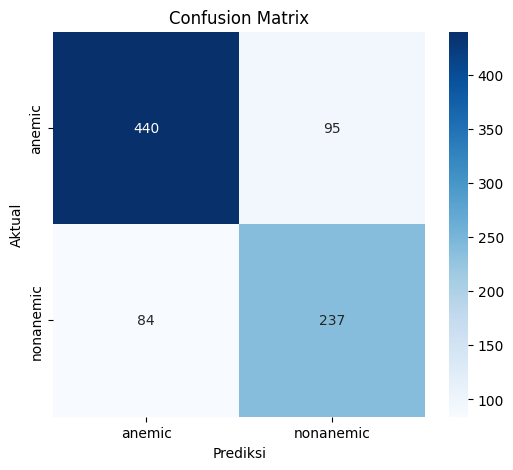

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfussion Matrix:")
print(cm)

Accuracy: 0.7908878504672897

Classification Report:
              precision    recall  f1-score   support

      anemic       0.84      0.82      0.83       535
   nonanemic       0.71      0.74      0.73       321

    accuracy                           0.79       856
   macro avg       0.78      0.78      0.78       856
weighted avg       0.79      0.79      0.79       856


Confussion Matrix:
[[440  95]
 [ 84 237]]


**Kesimpulan**

Berdasarkan hasil yang diperoleh, model KNN mampu digunakan untuk klasifikasi gambar dengan tingkat akurasi yang cukup baik, khususnya untuk dataset dengan jumlah sedang dan fitur yang direduksi secara tepat. Proses EDA dan preprocessing terbukti penting dalam menyiapkan data untuk pelatihan model. Untuk pengembangan lebih lanjut, dapat dipertimbangkan penggunaan metode klasifikasi berbasis deep learning seperti CNN (Convolutional Neural Network) untuk meningkatkan akurasi dan menangkap pola visual yang lebih kompleks. 